In [1]:
import numpy as np
from scipy import constants
import tabulate
import pandas as pd
import matplotlib.pyplot as plt
from IonChainTools import calcPositions,lengthScale
from tweezer_functions import *
import matplotlib.colors as mcolors

In [2]:
#Constants in SI units
eps0 = constants.epsilon_0 
m = 39.9626*constants.atomic_mass
c = constants.c
e = constants.e
hbar = constants.hbar
pi = np.pi

In [3]:
NA = 0.6
wx = 2*pi*1e6
d = 5e-6
tweezer_wavelength = 532*1e9
U = 15e-3
beam_waist = 0.41*tweezer_wavelength / NA

In [4]:
#calculate tweezer radial and axial frequencies here
omega_5_mW_r = omega_radial(U,beam_waist,m)
omega_5_mW_a = omega_axial(U,beam_waist,tweezer_wavelength,m)
print(omega_5_mW_r/(2*pi),omega_5_mW_a/(2*pi))
print(omega_5_mW_r/(2*pi) / omega_5_mW_a/(2*pi))

0.41629395203457087 0.13712057463448094
0.07690201867175281


In [6]:
N = 8
omega_rf_x = 1 * 2*pi * 1e6 * np.ones(N)
omega_a = 0.2*pi*1e6*2*np.ones(N)
base = mode_calc_r(m,omega_rf_x,omega_a)
#print(base)

In [7]:
omega_range_twee_r = np.linspace(0.107*2*pi*1e6 , 1.5*2*pi*1e6,2)
omega_range_twee_a = np.linspace(0.035*2*pi*1e6 , 0.158 * 2*pi*1e6 , 2)

In [8]:
N = 2
half_range = N - N//2
tweezed_ions = range(half_range)
omega_rf_x = 1.0 * pi * 1e6 *2
omega_a = omega_rf_x /3
omega_rf_x = omega_rf_x * np.ones(N)#rf pseudopotential applied to all ions
omega_a = omega_a * np.ones(N)

In [9]:
mode_vectors_per_strength =[]
for tweezer_strength in omega_range_twee_r:
    mode_vectors = []
    for omega_tw in omega_range_twee_r:
        omega_tw_x = np.full(N, omega_tw) * tweezer_strength
        omega_combined_x = np.sqrt(omega_tw_x**2 + omega_rf_x**2)  # Assuming omega_rf_x is defined
        modes = mode_calc_r(m, omega_combined_x, omega_a)  # Assuming m and omega_a are defined
        mode_vectors.append(modes)
    mode_vectors_per_strength.append(mode_vectors)

# Convert the list of mode vectors per strength into a numpy array
#mode_matrix_per_strength = np.array(mode_vectors_per_strength)

In [10]:
mode_vectors_per_strength[0]

[[(71936188588.84969, array([0.70710678, 0.70710678])),
  (71936188588.0774, array([-0.70710678,  0.70710678]))],
 [(1008451241802.8193, array([0.70710678, 0.70710678])),
  (1008451241802.7643, array([-0.70710678,  0.70710678]))]]

In [5]:
#setting up chain of ions to have N=17 ions, with ions 0,1,4,5,8,9,12,13 being tweezed

N = 17
tweezed_ions = [0,1,4,5,8,9,12,13]

#setting the frequency of the potential created by the tweezer 
#both along the k-vector of the laser (tweezer_strength_a) 
#and perpendicular to the k-vector (tweezer_strength_r)

tweezer_strength_r = 1.5*2*pi*1e6
tweezer_strength_a = 0.158 * 2*pi*1e6

#setting up the array of frequencies so only tweezed ions get tweezer frequencies

omega_tweezer_r = np.zeros(N)
omega_tweezer_a = np.zeros(N)
omega_tweezer_r[tweezed_ions] = tweezer_strength_r
omega_tweezer_a[tweezed_ions] = tweezer_strength_a

#print(omega_tweezer_r)
#print(omega_tweezer_a)

#setting the blade trap frequencies that all ions feel
omega_rf_r = 1.0 * pi * 1e6 *2
omega_a = omega_rf_r /8
omega_rf_r = omega_rf_r * np.ones(N) 
omega_a = omega_a * np.ones(N)


omega_combined_rr = np.sqrt(omega_rf_r**2 + omega_tweezer_r**2)
omega_combined_ra = np.sqrt(omega_rf_r**2 + omega_tweezer_a)
omega_combined_ar = np.sqrt(omega_a**2 + omega_tweezer_r**2)
#print(omega_combined_r)

In [6]:
#defining the modes created from every combination of tweezer radial/axial and trap radial/axial that are
#physically possible in our system
#also defining the radial and axial modes without tweezers
rr_modes = mode_calc_r(m,omega_combined_rr,omega_a)
ra_modes = mode_calc_r(m,omega_combined_ra,omega_a)
ar_modes = mode_calc_a(m,omega_combined_ar)
base_r = mode_calc_r(m,omega_rf_r,omega_a)
base_a = mode_calc_a(m,omega_a)

[11320222.61689868               nan               nan  9459674.62212955
  9555148.65065135  5172264.78793365  3046216.64688203  2531570.2386833
  1887168.67801232  1325132.17016086               nan   784987.56573798
   718440.99997983   679253.74261158   427782.5585418    176710.62359425
   180769.58289482]
[1295299.91858966 1230652.06275007 1165423.13943371 1099563.22306815
 1033014.22455375  965707.82786934  897562.69405284  828480.58338198
  125000.          216506.35094301  302529.46553099  384537.18673366
  463421.80689107  539832.35430346  758340.83606247  614241.14020842
  686992.2925802 ]


/Users/ritika/SQRL_Rithi_python/BladeRunner/Tweezers/tweezer_functions.py:160: RuntimeWarning: invalid value encountered in sqrt
  freqs =( np.sqrt(1*eigvals))/(2*pi*m) #eigenvalue = spring constant k, so freq = sqrt(e-val)/(2*pi*m)


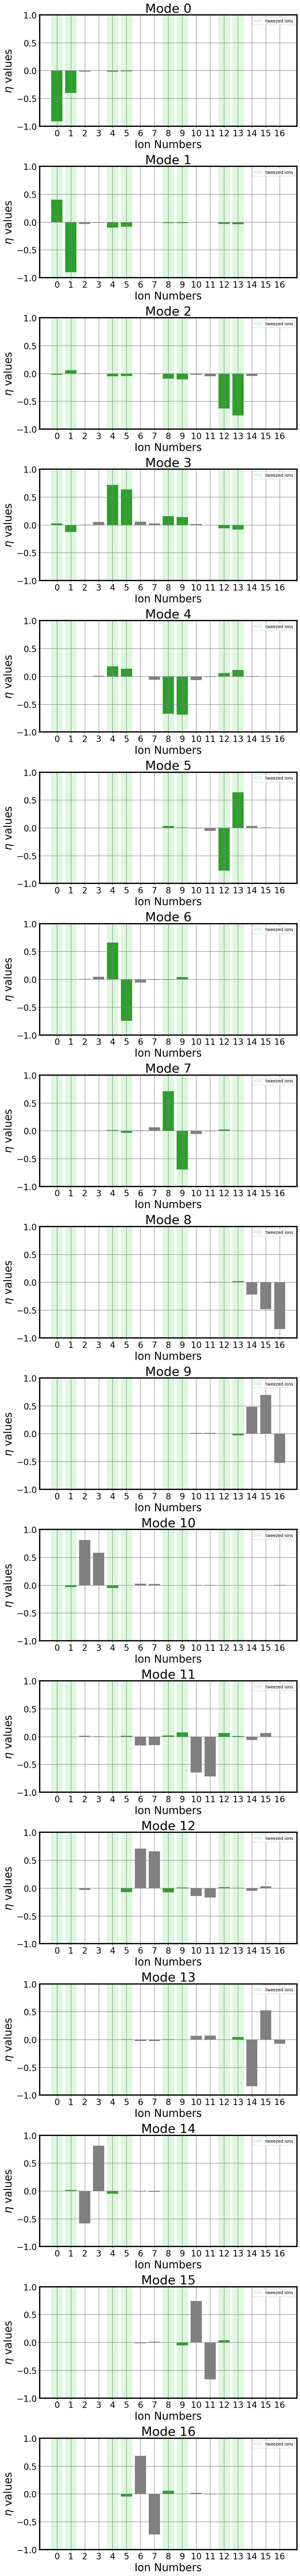

In [7]:
"""
omega_rf_r = 1.0 * pi * 1e6 *2
omega_a = omega_rf_r /8
omega_rf_r = omega_rf_r * np.ones(N) 
omega_a = omega_a * np.ones(N)
omega_combined_rr = np.sqrt(omega_rf_r**2 + omega_tweezer_r**2)
rr_modes = mode_calc_r(m,omega_combined_rr,omega_a)"""
# Create a figure with subplots
fig, axes = plt.subplots(nrows=17, ncols=1, figsize=(10, 85), dpi=100)  # Adjusted figsize and dpi

# Loop through each mode and plot
for i in range(17):  # Single column for modes 0-16
    ion_numbers = np.arange(0, N)
    tweezed_ions = [0,1,4,5,8,9,12,13]
    ax = axes[i]
    ion_numbers = np.arange(0, N)
    ax.bar(ion_numbers, rr_modes[i][1], color = ['green'  if x in tweezed_ions else 'gray' for x in ion_numbers])
    ax.bar(tweezed_ions, 1,color = 'lightgreen',alpha = 0.3)
    ax.bar(tweezed_ions, -1,color = 'lightgreen',alpha = 0.3,label = "tweezed ions")
    ax.set_title(f'Mode {i}', fontsize=30)
    ax.set_xlabel('Ion Numbers', fontsize=25)
    ax.set_ylabel('$\eta $ values', fontsize=25)
    ax.set_ylim(-1, 1)  # Setting y-axis limits from -1 to 1 for all plots
    ax.set_xticks(ion_numbers)  # Adjusted to properly show ion numbers instead
    ax.legend()

    # Set thicker axes lines
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)

    # Add gridlines
    ax.grid(True, which='both', axis='both', color='gray', linestyle='-', linewidth=1)

    # Set tick labels fontsize
    ax.tick_params(axis='both', which='major', labelsize=20)

# Use tight layout to adjust spacing
fig.tight_layout()
#plt.savefig("17_ions_tweezed_modes_bars.png")
plt.show()

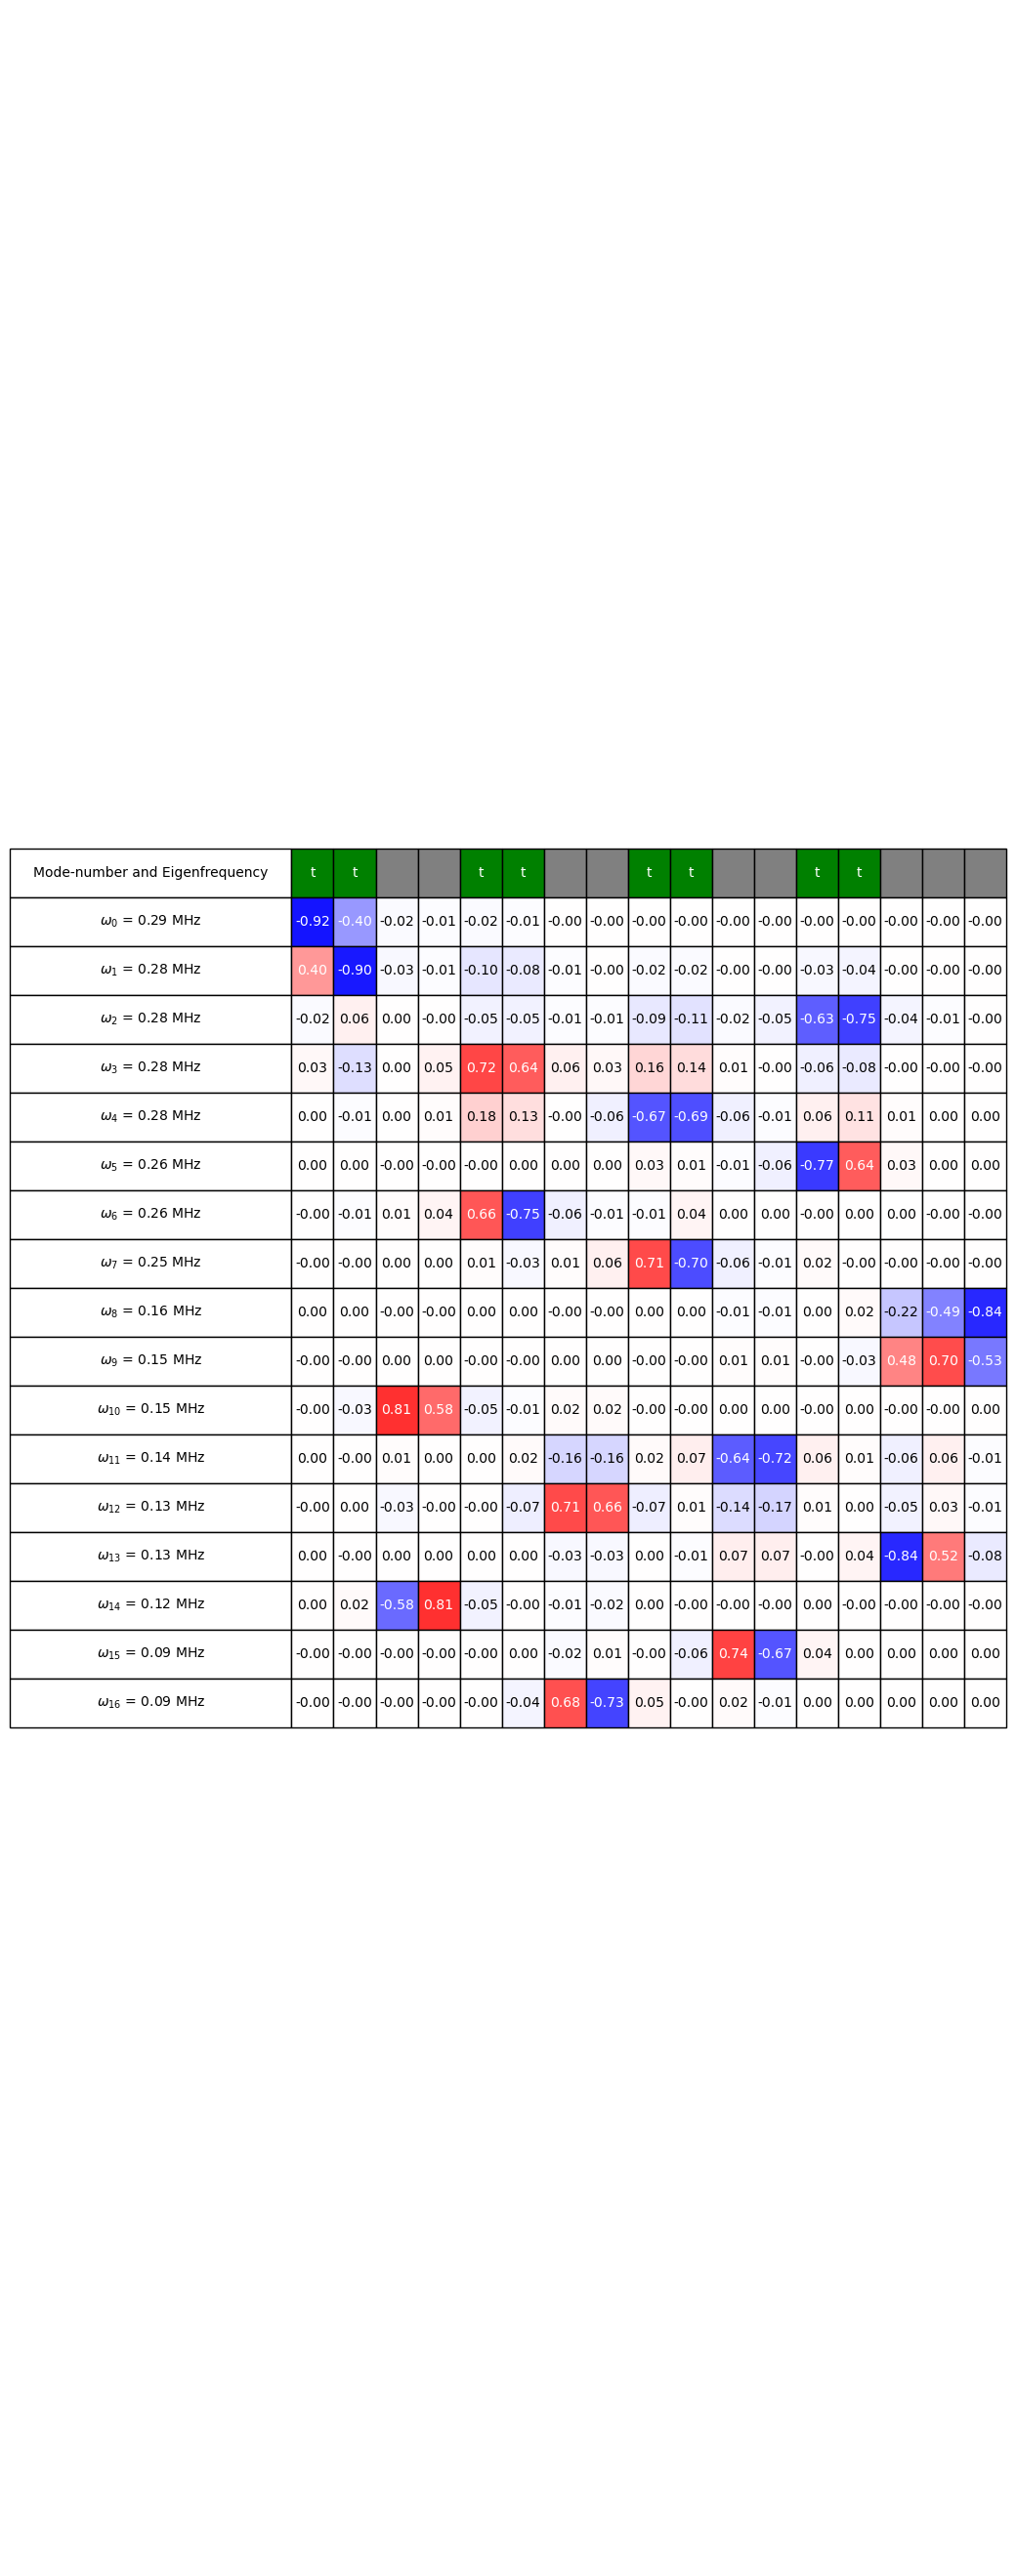

In [8]:
data = rr_modes

# Creating the plot
fig, ax = plt.subplots(figsize=(12, 2 * len(data)))
ax.axis('tight')
ax.axis('off')

# Adding a table
table_data = []
for index, (omega, values) in enumerate(data):
    # Convert omega from radians per second to MHz
    omega_mhz = (omega / (2 * np.pi)) / 1e6
    formatted_values = [f"{value:.2f}" for value in values]
    omega_label = f"$\omega_{{{index}}}$ = {omega_mhz:.2f} MHz"
    table_data.append([omega_label] + formatted_values)

# Create column labels

column_labels = ['Mode-number and Eigenfrequency']  # Start with the label for the frequency column
for i in range(len(data[0][1])):
    if i + 1 in [1, 2, 5, 6, 9, 10, 13, 14]:  # These columns will have 't'
        column_labels.append('t')
    else:
        column_labels.append(' ')  # Other columns remain blank
# The table
table = ax.table(cellText=table_data, colLabels=column_labels, loc='center', cellLoc='center')

# Adjust font and cell size
table.auto_set_font_size(False)
table.set_fontsize(10)

# Adjusting column widths
colWidths = [0.3] * (len(data[0][1]) + 1)
colWidths[0] = 0.3  # Adjust the first column width as needed
table.auto_set_column_width(col=[i for i in range(len(colWidths))])

# Adjusting row heights
table.scale(1, 3)  # Increase the second argument to make rows taller

# Color map for background colors
cmap = plt.get_cmap('bwr')
norm = mcolors.Normalize(vmin=-1, vmax=1)

light_gray_columns = [1, 2, 5, 6, 9, 10, 13, 14]
# Applying color to the value cells
for i, row in enumerate(table_data, start=1):
    for j in range(1, len(row)):
        value = float(row[j])
        color = cmap(norm(value))
        table[i, j].set_facecolor(color)
        table[i, j].set_text_props(color='black' if -0.3 < value < 0.3 else 'white')

# Special coloring for the first row
light_gray_columns = [1, 2, 5, 6, 9, 10, 13, 14]
for j in range(1, len(column_labels)):  # Start from 1 to skip the first cell
    if j in light_gray_columns:
        table[0, j].set_facecolor('green')  # Set specified columns' background to blue
        table[0,j].set_text_props(color = 'white')
    else:
        table[0, j].set_facecolor('gray')  # Set other columns' background to gray
table[0, 0].set_facecolor('white')  # Set top left corner cell background to white

"""# Adjusting specific header cells for borders
for i in range(1, len(colWidths)):
    if i == 2:  # Correct index for m=0
        table[0, i].visible_edges = 'T'  # Top border only
    elif i == len(colWidths) - 1:  # Correct index for m=16
        table[0, i].visible_edges = 'TR'  # Top and Right borders
    else:
        table[0, i].visible_edges = 'T'  # Only top border for other cells"""

plt.savefig("17_ions_modes_tweezed_table.png")
plt.show()


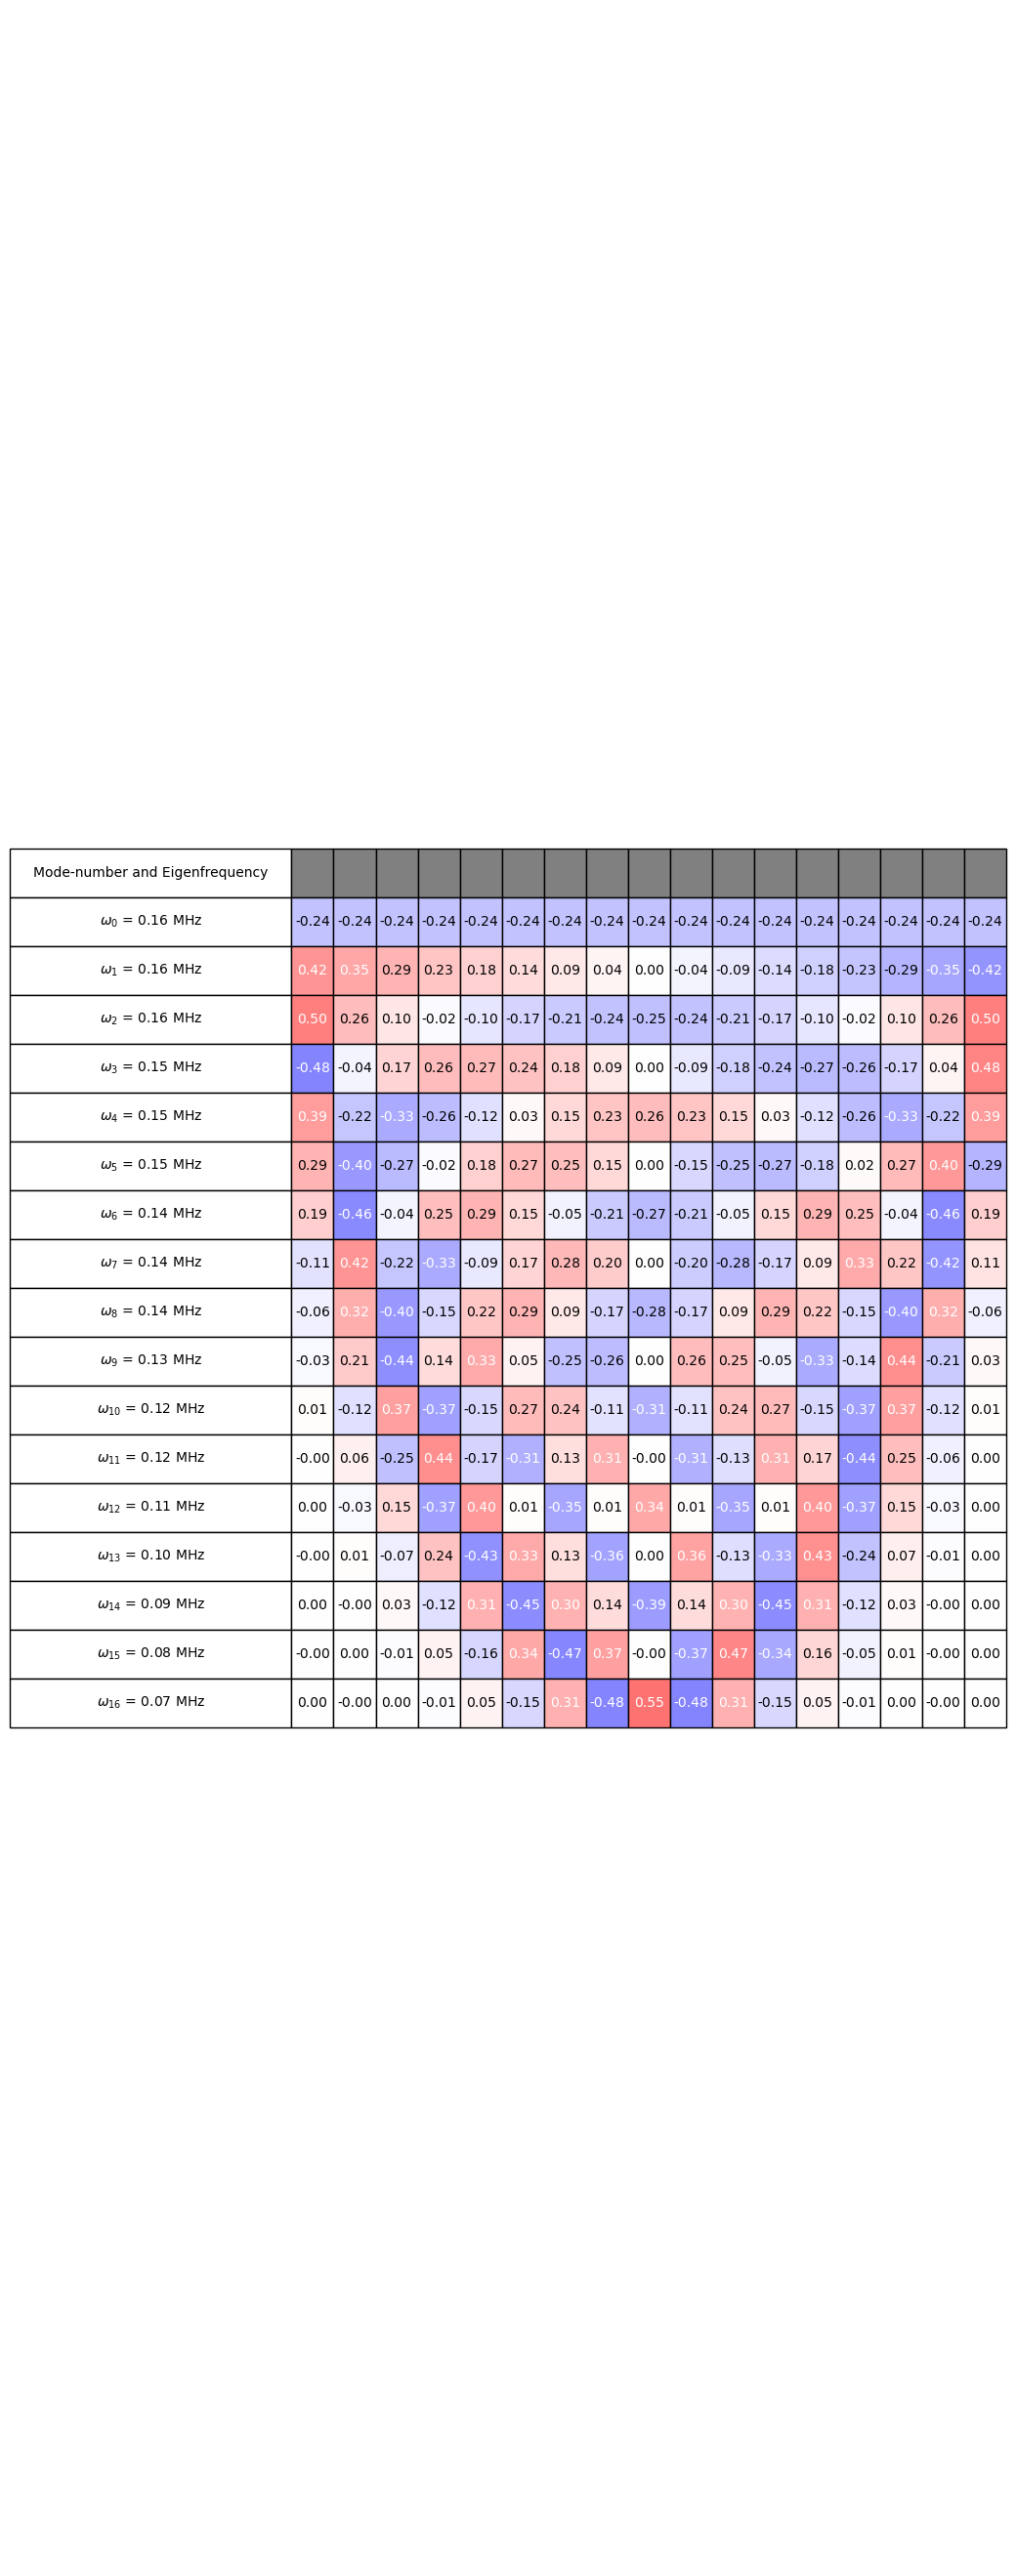

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

data = base_r  

# Creating the plot
fig, ax = plt.subplots(figsize=(12, 2 * len(data)))
ax.axis('tight')
ax.axis('off')

# Adding a table
table_data = []
for index, (omega, values) in enumerate(data):
    # Convert omega from radians per second to MHz
    omega_mhz = (omega / (2 * np.pi)) / 1e6
    formatted_values = [f"{value:.2f}" for value in values]
    omega_label = f"$\omega_{{{index}}}$ = {omega_mhz:.2f} MHz"
    table_data.append([omega_label] + formatted_values)

# Create column labels
column_labels = ['Mode-number and Eigenfrequency'] + [" " for i in range(len(data[0][1]))]

# The table
table = ax.table(cellText=table_data, colLabels=column_labels, loc='center', cellLoc='center')

# Adjust font and cell size
table.auto_set_font_size(False)
table.set_fontsize(10)

# Adjusting column widths
colWidths = [0.3] * (len(data[0][1]) + 1)
colWidths[0] = 0.3  # Adjust the first column width as needed
table.auto_set_column_width(col=[i for i in range(len(colWidths))])

# Adjusting row heights
table.scale(1, 3)  # Increase the second argument to make rows taller

# Color map for background colors
cmap = plt.get_cmap('bwr')
norm = mcolors.Normalize(vmin=-1, vmax=1)

# Applying color to the value cells
for i, row in enumerate(table_data, start=1):
    for j in range(1, len(row)):
        value = float(row[j])
        color = cmap(norm(value))
        table[i, j].set_facecolor(color)
        table[i, j].set_text_props(color='black' if -0.3 < value < 0.3 else 'white')

# Set gold background for the first row, excluding the top left corner cell
for j in range(1, len(column_labels)):  # Skip the top left corner cell
    table[0, j].set_facecolor('gray')
table[0, 0].set_facecolor('white')  # Keep the top left corner cell white

plt.savefig("17_ions_modes_table.png")
plt.show()


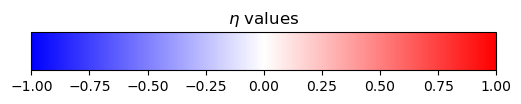

In [38]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.colorbar as mcolorbar

# Define the color map and normalization
cmap = plt.get_cmap('bwr')
norm = mcolors.Normalize(vmin=-1, vmax=1)

# Create a figure and axis for the color bar
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
plt.title("$\eta$ values")

# Create a color bar
cbar = mcolorbar.ColorbarBase(ax, cmap=cmap,
                              norm=norm,
                              orientation='horizontal')

cbar.set_label('')
plt.show()


In [50]:
base_r[0]

(999999.9999999997,
 array([-0.24253563, -0.24253563, -0.24253563, -0.24253563, -0.24253563,
        -0.24253563, -0.24253563, -0.24253563, -0.24253563, -0.24253563,
        -0.24253563, -0.24253563, -0.24253563, -0.24253563, -0.24253563,
        -0.24253563, -0.24253563]))

In [51]:
rr_modes[15]

(589776.5060685733,
 array([-6.68249815e-06, -8.82766481e-06, -7.14196232e-05, -1.51919454e-04,
        -2.24826365e-05,  1.11201473e-03, -1.79811836e-02,  1.11197519e-02,
        -1.88115326e-03, -5.55284773e-02,  7.42154128e-01, -6.66429575e-01,
         3.91879799e-02,  1.04368407e-03,  2.60836138e-03,  2.67696344e-04,
         1.47586877e-04]))

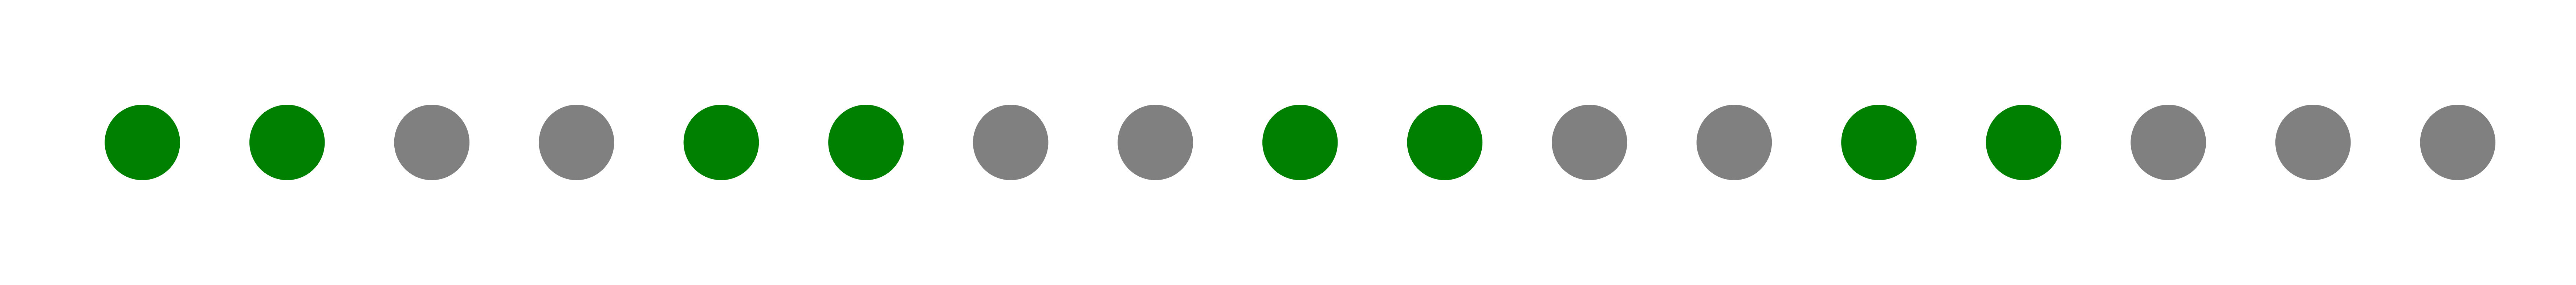

In [49]:
import matplotlib.pyplot as plt

def draw_circle(ax, x, y, color):
    circle = plt.Circle((x, y), 0.3, color=color)
    ax.add_artist(circle)

def main():
    fig, ax = plt.subplots(figsize=(15, 3),dpi = 600)
    ax.set_aspect('equal')
    ax.set_xlim(-1, 20)
    ax.set_ylim(-1, 1)
    ax.axis('off')
    
    colors = ['green','green','gray','gray','green','green','gray','gray',
              'green','green','gray','gray','green','green','gray','gray','gray']
    
    x_offset = 0
    for i, color in enumerate(colors):
        draw_circle(ax, i * 1.2 + x_offset, 0, color)
    
    plt.savefig('circles.png', bbox_inches='tight', pad_inches=0)
    plt.show()

if __name__ == "__main__":
    main()


#### 